In [1]:
import numpy as np

In [23]:
X = np.ones((2,3))

In [24]:
X

array([[1., 1., 1.],
       [1., 1., 1.]])

In [25]:
W = np.array([
    [1.,2.,3.],
    [4.,5.,6.],
])

In [26]:
W

array([[1., 2., 3.],
       [4., 5., 6.]])

In [28]:
X.shape, W.shape

((2, 3), (2, 3))

In [29]:
X @ W

ValueError: shapes (2,3) and (2,3) not aligned: 3 (dim 1) != 2 (dim 0)

In [31]:
X.sum(axis=0)

array([2., 2., 2.])

In [40]:
W / W.sum(axis=1).reshape(-1, 1)

array([[0.16666667, 0.33333333, 0.5       ],
       [0.26666667, 0.33333333, 0.4       ]])

In [38]:
W.sum(axis=1)

array([ 6., 15.])

In [42]:
W.max(axis=1).shape

(2,)

In [45]:
X = np.arange(4).reshape((2,2))

In [46]:
X

array([[0, 1],
       [2, 3]])

In [48]:
X, X.shape

(array([[0, 1],
        [2, 3]]), (2, 2))

In [53]:
np.apply_along_axis(np.diag, 1, X), np.apply_along_axis(np.diag, 1, X).shape

(array([[[0, 0],
         [0, 1]],
 
        [[2, 0],
         [0, 3]]]), (2, 2, 2))

In [54]:
X = np.arange(1,5).reshape(2,2)
Y = np.arange(5,9).reshape(2,2)

In [73]:
X @ X

array([[1, 2],
       [3, 4]])

In [68]:
X.reshape(1,2,2) @ X

array([[[ 7, 10],
        [15, 22]]])

In [72]:
np.outer(X,X).reshape()

array([[ 1,  2,  3,  4],
       [ 2,  4,  6,  8],
       [ 3,  6,  9, 12],
       [ 4,  8, 12, 16]])

In [74]:
np.apply_along_axis(np.outer, 1, X)

TypeError: outer() missing 1 required positional argument: 'b'

In [75]:
X

array([[1, 2],
       [3, 4]])

In [88]:
np.einsum('bi,bo->bio', X, X)

array([[[ 1,  2],
        [ 2,  4]],

       [[ 9, 12],
        [12, 16]]])

In [ ]:
b: np.ndarray = x.max(axis=1).reshape(-1, 1)
        print("B:\n", b)
        y: np.ndarray = np.exp(x - b)
        print("Y:\n", y)
        out = (y / y.sum(axis=1)).reshape(-1, 1)
        print("OUT:\n", out)

In [109]:
X = np.array([1,2,3,4,6,9]).reshape(2,3)
X

array([[1, 2, 3],
       [4, 6, 9]])

In [110]:
b = X.max(axis=1).reshape(-1, 1)
b

array([[3],
       [9]])

In [111]:
y = X - b
y

array([[-2, -1,  0],
       [-5, -3,  0]])

In [115]:
y.sum(axis=1

(2,)

In [116]:
y / y.sum(axis=1).reshape(-1,1)

array([[ 0.66666667,  0.33333333, -0.        ],
       [ 0.625     ,  0.375     , -0.        ]])

In [118]:
X = np.arange(6).reshape(2,3)
X

array([[0, 1, 2],
       [3, 4, 5]])

In [120]:
W = np.arange(18).reshape(2,3,3)
W

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]]])

In [124]:
out = X@W
out

array([[[ 15,  18,  21],
        [ 42,  54,  66]],

       [[ 42,  45,  48],
        [150, 162, 174]]])

In [126]:
X.shape, W.shape, out.shape

((2, 3), (2, 3, 3), (2, 2, 3))

In [130]:
np.einsum('ij,ijp->ip',X,W)

array([[ 15,  18,  21],
       [150, 162, 174]])

In [146]:
X = np.arange(1,5).reshape(2,2)
I = np.eye(2)

In [147]:
X

array([[1, 2],
       [3, 4]])

In [148]:
I

array([[1., 0.],
       [0., 1.]])

In [155]:
np.einsum('ij,mj -> imj', X, I)

array([[[[1., 0.],
         [0., 1.]],

        [[2., 0.],
         [0., 2.]]],


       [[[3., 0.],
         [0., 3.]],

        [[4., 0.],
         [0., 4.]]]])

In [156]:
IW = np.eye(3)
IX = np.eye(2)

In [162]:
np.einsum('ij,mn->imn',IW,IX)

array([[[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]]])

In [163]:
np.einsum('ij,mn->imn',IW,IX).shape

(3, 2, 2)

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

In [23]:
np_train = pd.read_csv('results/mlp_numpy_train.csv')

In [24]:
np_eval = pd.read_csv('results/mlp_numpy_eval.csv')

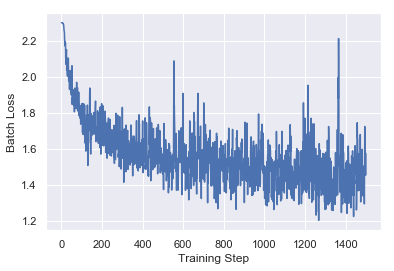

In [25]:
ax = sns.lineplot(x='step', y='loss', data=np_train)
ax.set(xlabel='Training Step', ylabel='Batch Loss')
plt.savefig('figures/mlp_numpy_train_loss.png', dpi=160)

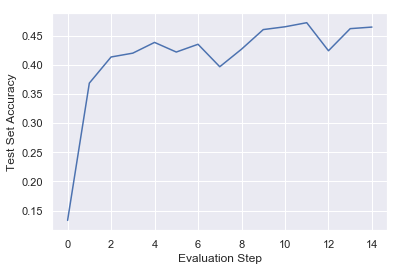

In [26]:
ax = sns.lineplot(x='step', y='acc', data=np_eval)
ax.set(xlabel='Evaluation Step', ylabel='Test Set Accuracy')
plt.savefig('figures/mlp_numpy_eval_acc.png', dpi=160)

In [17]:
pt_train = pd.read_csv('results/mlp_pytorch_default_train.csv')
pt_train.head()

,step,loss,acc
0,0,18.676653,0.090
1,1,62.157467,0.155
2,2,72.909645,0.210
3,3,122.132347,0.115
4,4,92.899323,0.210


In [18]:
pt_eval = pd.read_csv('results/mlp_pytorch_default_eval.csv')
pt_eval.head()

,step,loss,acc
0,0,67.421249,0.1718
1,1,1.999342,0.3573
2,2,1.897841,0.3420
3,3,1.762163,0.3864
4,4,1.877959,0.3950


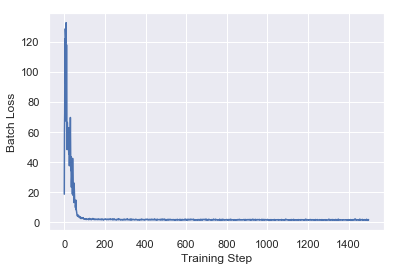

In [19]:
ax = sns.lineplot(x='step', y='loss', data=pt_train)
ax.set(xlabel='Training Step', ylabel='Batch Loss')
plt.savefig('figures/mlp_pytorch_train_loss.png', dpi=160)

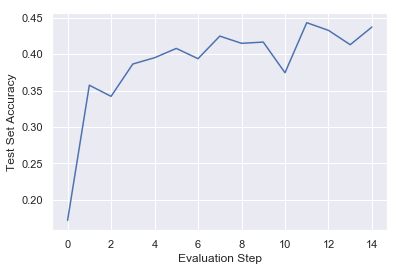

In [20]:
ax = sns.lineplot(x='step', y='acc', data=pt_eval)
ax.set(xlabel='Evaluation Step', ylabel='Test Set Accuracy')
plt.savefig('figures/mlp_pytorch_eval_acc.png', dpi=160)

## With Adam

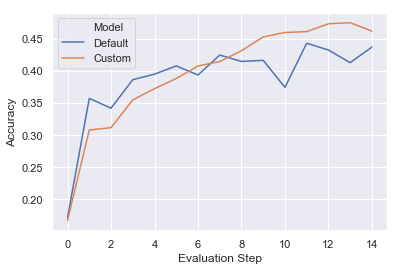

In [98]:
pt_default_eval = pd.read_csv('results/mlp_pytorch_default_eval.csv')
pt_default_eval['Model'] = 'Default'
pt_default_eval.columns = ['Evaluation Step', 'Loss', 'Accuracy', 'Model']
pt_default_eval.shape
pt_custom_eval = pd.read_csv('results/mlp_pytorch_custom_eval.csv')
pt_custom_eval['Model'] = 'Custom'
pt_custom_eval.columns = ['Evaluation Step', 'Loss', 'Accuracy', 'Model']
pt_eval = pd.concat([pt_default_eval, pt_custom_eval], ignore_index=True)
adam_ax = sns.lineplot(x='Evaluation Step', y='Accuracy', hue='Model', data=pt_eval)

## With BatchNorm

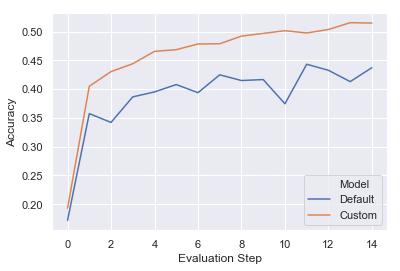

In [99]:
pt_default_eval = pd.read_csv('results/mlp_pytorch_default_eval.csv')
pt_default_eval['Model'] = 'Default'
pt_default_eval.columns = ['Evaluation Step', 'Loss', 'Accuracy', 'Model']
pt_default_eval.shape
pt_custom_eval = pd.read_csv('results/mlp_pytorch_custom_eval.csv')
pt_custom_eval['Model'] = 'Custom'
pt_custom_eval.columns = ['Evaluation Step', 'Loss', 'Accuracy', 'Model']
pt_eval = pd.concat([pt_default_eval, pt_custom_eval], ignore_index=True)
bn_ax = sns.lineplot(x='Evaluation Step', y='Accuracy', hue='Model', data=pt_eval)

## With Dropout

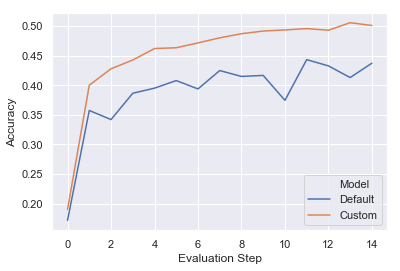

In [100]:
pt_default_eval = pd.read_csv('results/mlp_pytorch_default_eval.csv')
pt_default_eval['Model'] = 'Default'
pt_default_eval.columns = ['Evaluation Step', 'Loss', 'Accuracy', 'Model']
pt_default_eval.shape
pt_custom_eval = pd.read_csv('results/mlp_pytorch_custom_eval.csv')
pt_custom_eval['Model'] = 'Custom'
pt_custom_eval.columns = ['Evaluation Step', 'Loss', 'Accuracy', 'Model']
pt_eval = pd.concat([pt_default_eval, pt_custom_eval], ignore_index=True)
bn_ax = sns.lineplot(x='Evaluation Step', y='Accuracy', hue='Model', data=pt_eval)

## With 3 Layers (1024, 512, 256)

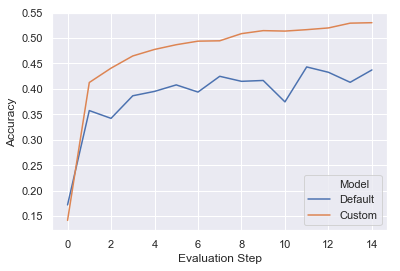

In [102]:
pt_default_eval = pd.read_csv('results/mlp_pytorch_default_eval.csv')
pt_default_eval['Model'] = 'Default'
pt_default_eval.columns = ['Evaluation Step', 'Loss', 'Accuracy', 'Model']
pt_default_eval.shape
pt_custom_eval = pd.read_csv('results/mlp_pytorch_custom_eval.csv')
pt_custom_eval['Model'] = 'Custom'
pt_custom_eval.columns = ['Evaluation Step', 'Loss', 'Accuracy', 'Model']
pt_eval = pd.concat([pt_default_eval, pt_custom_eval], ignore_index=True)
bn_ax = sns.lineplot(x='Evaluation Step', y='Accuracy', hue='Model', data=pt_eval)

## With 5000 Training Steps

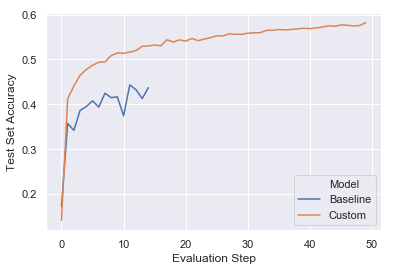

In [33]:
pt_default_eval = pd.read_csv('results/mlp_pytorch_default_eval.csv')
pt_default_eval['Model'] = 'Baseline'
pt_default_eval.columns = ['Evaluation Step', 'Loss', 'Test Set Accuracy', 'Model']
pt_custom_eval = pd.read_csv('results/mlp_pytorch_custom_eval.csv')
pt_custom_eval['Model'] = 'Custom'
pt_custom_eval.columns = ['Evaluation Step', 'Loss', 'Test Set Accuracy', 'Model']
pt_eval = pd.concat([pt_default_eval, pt_custom_eval], ignore_index=True)
bn_ax = sns.lineplot(x='Evaluation Step', y='Test Set Accuracy', hue='Model', data=pt_eval)
plt.savefig('figures/custom_mlp_pytorch_compare.png', dpi=160)

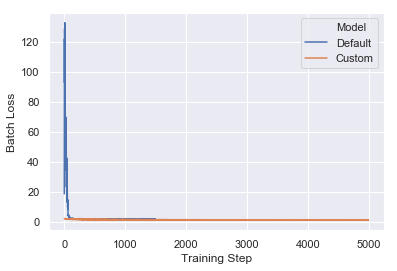

In [32]:
pt_default_train = pd.read_csv('results/mlp_pytorch_default_train.csv')
pt_default_train['Model'] = 'Default'
pt_default_train.columns = ['Training Step', 'Batch Loss', 'Accuracy', 'Model']
pt_custom_train = pd.read_csv('results/mlp_pytorch_custom_train.csv')
pt_custom_train['Model'] = 'Custom'
pt_custom_train.columns = ['Training Step', 'Batch Loss', 'Accuracy', 'Model']
pt_train = pd.concat([pt_default_train, pt_custom_train], ignore_index=True)
bn_ax_train = sns.lineplot(x='Training Step', y='Batch Loss', hue='Model', data=pt_train)
plt.savefig('figures/custom_mlp_pytorch_compare_loss.png', dpi=160)

## ConvNet

In [11]:
conv_train = pd.read_csv('results/conv_pytorch_train.csv')
conv_train.columns = ['Training Step', 'Batch Loss', 'Accuracy']
conv_eval = pd.read_csv('results/conv_pytorch_eval.csv')
conv_eval.columns = ['Evaluation Step', 'Loss', 'Test Set Accuracy']

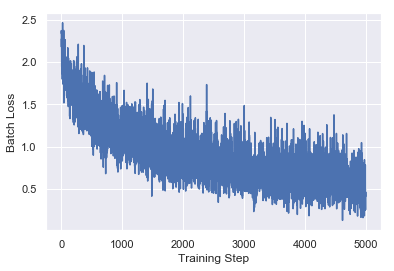

In [12]:
conv_ax = sns.lineplot(x='Training Step', y='Batch Loss', data=conv_train)
plt.savefig('figures/conv_pytorch_train_loss.png', dpi=160)

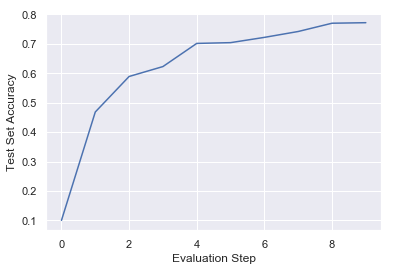

In [13]:
conv_ax = sns.lineplot(x='Evaluation Step', y='Test Set Accuracy', data=conv_eval)
plt.savefig('figures/conv_pytorch_eval_acc.png', dpi=160)